/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_70980/2582155510.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval = interval, period = PERIOD)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,gain,loss,avg_gain,avg_loss,RSI,...,Pos_Flow,Neg_Flow,MFR,MFI,RSI_Strategy,MFI_Strategy,Confl_strategy,Strategy,asset_cum_returns,strategy_cum_returns
4742,666.780029,667.289978,666.710022,667.140015,11300614,0.000000,0.362000,0.469430,0.148712,75.942082,...,0.000000,666.926676,3.336017,76.937362,NaN,NaN,NaN,0,NaN,NaN
4743,666.619995,667.340027,666.359985,666.719971,13063179,0.000000,0.160034,0.469430,0.133715,77.830383,...,0.000000,666.773336,2.499274,71.422645,-1.0,-1.0,-2.0,1,-0.000240,-0.000240
4744,666.150024,666.760010,666.020020,666.630005,6214358,0.000000,0.469971,0.469430,0.084429,84.756222,...,0.000000,666.310018,2.494479,71.383433,-1.0,-1.0,-2.0,1,-0.000945,-0.000945
4745,665.239990,666.239990,664.969971,666.150024,9082129,0.000000,0.910034,0.345860,0.149432,69.829589,...,0.000000,665.483317,1.796999,64.247397,-1.0,-1.0,-2.0,1,-0.002310,-0.002310
4746,663.708008,665.840027,663.690002,665.234985,8996590,0.000000,1.531982,0.345860,0.258144,57.261231,...,0.000000,664.412679,1.332127,57.120691,0.0,0.0,0.0,0,-0.004607,-0.002310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,675.049988,675.640015,672.760010,674.400024,8106653,0.654968,-0.000000,0.586788,1.116786,34.444504,...,674.483337,0.000000,0.556536,35.754774,0.0,1.0,1.0,0,0.012403,0.023140
5012,673.130005,675.659973,672.140015,675.054993,9745100,0.000000,1.919983,0.513572,1.253928,29.056391,...,0.000000,673.643331,0.399941,28.568441,0.0,0.0,0.0,0,0.009523,0.023140
5013,674.019897,674.440002,671.489990,673.109985,9663134,0.889893,-0.000000,0.577135,1.199284,32.488686,...,0.000000,673.316630,0.400522,28.598077,1.0,1.0,2.0,1,0.010858,0.024492
5014,672.645020,675.119995,672.210022,674.020020,9331407,0.000000,1.374878,0.533561,1.297490,29.139593,...,673.325012,0.000000,0.556650,35.759473,0.0,1.0,1.0,0,0.008796,0.024492


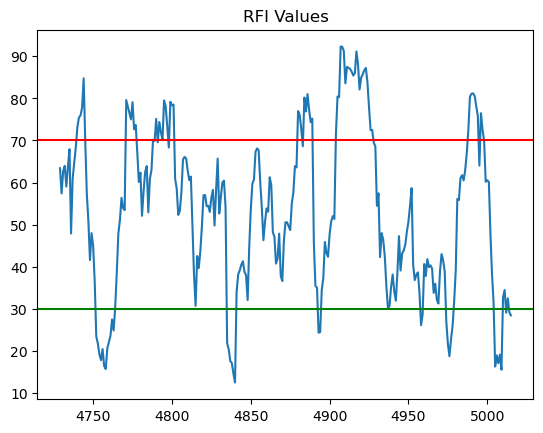

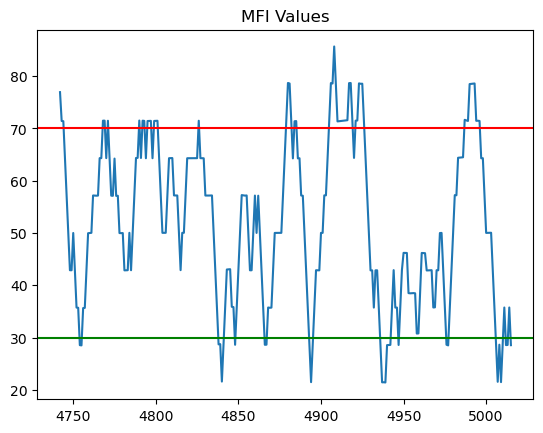

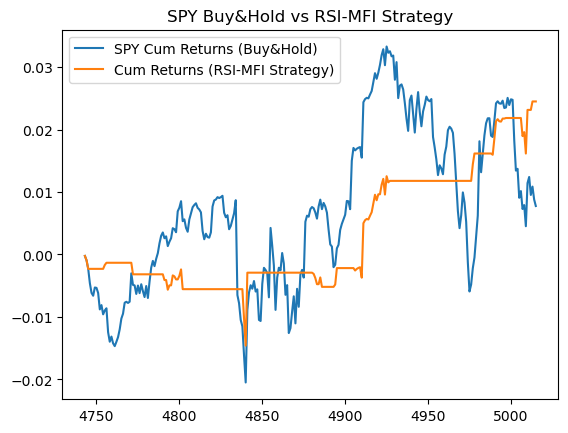

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Step 1: Ticker
TICKER = "SPY"

# Step 2: Price Behavior 
INTERVAL = "1h"
if INTERVAL == "1h":
    PERIOD = "720d"
else:
    PERIOD = "max"

# Step 3: RSI
RSI_LENGTH = 14
RSI_OVERBROUGHT = 70
RSI_OVERSOLD = 30

# Step 4: MFI
MFI_LENGTH = 14
MFI_OVERBROUGHT = 70
MFI_OVERSOLD = 30

# Step 5: Data Subsection
LOOKBACK = 300

def get_data(ticker = TICKER, interval = INTERVAL, lookback = LOOKBACK):

    # Step 1: download data 
    df = yf.download(ticker, interval = interval, period = PERIOD)

    # Step 2: Select Level 0 from Multilevel Column
    df.columns = df.columns.get_level_values(0)

    # Step 3: Simplifying df-Index for plots
    df = df.reset_index(drop=True)

    # Step 4: Return Subsect Data 
    return df.iloc[-lookback:,:]
        # -lookback: all loockback rows
        # : all columns 

def add_RSI(df, length = RSI_LENGTH):

    # Step 1: Define Delta (Price Changes between the Rows)
    price_change = df["Close"].diff()

    # Step 2: Group Price Changes based on Positive/Negative Returns
    df["gain"] = price_change.where(price_change > 0, 0)
    df["loss"] = - price_change.where(price_change < 0, 0)
        # -: we need postive numbers for the "loss" Columns, otherwise the Relative Strength 
        # will always be negative

    # Step 3: Calculate the Rolling Average for length Days
    df["avg_gain"] = df["gain"].rolling(window = length).mean()
    df["avg_loss"] = df["loss"].rolling(window = length).mean()

    # Step 4: Calculate the Relative Strength
    rs = df["avg_gain"] / df["avg_loss"]
        # In percentage Terms: how much stronger have the Up Days been compared to the Down Days
        # rs = 3: avg_gain was 3x larger than the average loss --> Strong Upward Momentum
        # rs = 0.5: avg_gain was half the size of the average loss --> Strong Downward Momentum

    # Step 5: Calculate the RSI w/ Standardization (Values between 0-100)
    df["RSI"] = 100 - (100/(1+rs))

    # Step 6: Plot the RSI 
    plt.figure()
    plt.plot(df["RSI"])
    plt.title("RFI Values")

    # Stet 7: Plot horizontal lines for Overbrought/Oversold 
    plt.axhline(OVERBROUGHT, color="red") 
    plt.axhline(OVERSOLD, color="green")
        # Crossing Overbrought Line: triggers Short Signal 
        # Crossing Oversold Line: treiggers Long Signal

    return df.dropna()

def add_MFI(df, length = MFI_LENGTH):
    # Step 1: Build the MFI Index 
    df["Average_Price"] = (df["High"]+df["Low"]+df["Close"])/3
    df["Money_Flow"] = df["Volume"]*df["Average_Price"]
    df["Pos_Flow"] = np.where(df["Average_Price"].diff()>0, df["Average_Price"], 0)
    df["Neg_Flow"] = np.where(df["Average_Price"].diff()<0, df["Average_Price"], 0)
    df["MFR"] = df["Pos_Flow"].rolling(window = length).sum() / df["Neg_Flow"].rolling(window = length).sum()
    df["MFI"] = (100 - 100 / (1 + df["MFR"]))

    # Step 2: Plot the MFI Index
    plt.figure()
    plt.plot(df["MFI"])
    plt.title("MFI Values")

    # Step 3: Draw Overbrought & Oversold Lines
    plt.axhline(OVERBROUGHT, color = "red")
    plt.axhline(OVERSOLD, color="green")

    # Step 4: Return Values withtout NA
    return df.dropna()

def add_RSI_strategy(df, overbrought = RSI_OVERBROUGHT, oversold = RSI_OVERSOLD):

    # Step 1: Short when RSI > overbrought, Long when RSI < oversold
    df["RSI_Strategy"] = np.where(df["RSI"] > overbrought, -1,
                        np.where(df["RSI"] < oversold, 1, 0))

    # Step 2: Prevent lookahed bias (only use information that is available)
    df["RSI_Strategy"] = df["RSI_Strategy"].shift(1)

    return df    

def add_MFI_strategy(df, overbrought = MFI_OVERBROUGHT, oversold = MFI_OVERSOLD):
    
    # Step 1: Short when MFI > overbrought, Long when MFI < oversold
    df["MFI_Strategy"] = np.where(df["MFI"] > overbrought, -1,
                        np.where(df["MFI"] < oversold, 1, 0))
    
    # Step 2: Prevent lookahed bias (only use information that is available)
    df["MFI_Strategy"] = df["MFI_Strategy"].shift(1)

    return df

def add_confluence_strategy(df):

    # Step 1: Sum both Strategies
    df["Confl_strategy"] = df["RSI_Strategy"] + df["MFI_Strategy"]

    # Step 1: Only keep values of 2, 0 or -2 (where both strategies align)
    df["Strategy"] = np.where(df["Confl_strategy"] == 2, 1,
                    np.where(df["Confl_strategy"] == -2, 1, 0))
    
    return df

def test_strategy(df):

    # Step 1: Buy&Hold Compound Returns - What is my total profit if I bought on day one and just held it?
    df["asset_cum_returns"] = (1 + df["Close"].pct_change()).cumprod() - 1
        # pct.change(): get the tiny percentage return per day
        # cumprod(): multiply all of those returns together (compounding)
        # 1+ ... -1: turn daily returns like 2% in 1.02 and then back to eg 30% again

    # Step 2: Total Profits only if I followed my strategy's signals
    df["strategy_cum_returns"] = (1 + df["Close"].pct_change() * df["Strategy"]).cumprod() -1
        # *df["Strategy": 
        #   (1) you get the normal daily return, 
        #   (-1) you get the opposite of the daily return. Only if the market goes down, you win
        #   (0) you wait and get 0 return
        # pct_change() * df["Strategy"]: 

    # Step 3: Plot Returns
    plt.figure()
    plt.plot(df["asset_cum_returns"])
    plt.plot(df["strategy_cum_returns"])
    plt.legend([f"{TICKER} Cum Returns (Buy&Hold)", "Cum Returns (RSI-MFI Strategy)"])
    plt.title(f"{TICKER} Buy&Hold vs RSI-MFI Strategy")

    return df

def main():
    df = get_data()
    df = add_RSI(df)
    df = add_MFI(df)
    df = add_RSI_strategy(df)
    df = add_MFI_strategy(df)
    df = add_confluence_strategy(df)
    df = test_strategy(df)

    return df 

df = main()
df


In [38]:
df["MFI_Strategy"].value_counts()

MFI_Strategy
 0.0    191
-1.0     53
 1.0     29
Name: count, dtype: int64

In [39]:
df["RSI_Strategy"].value_counts()

RSI_Strategy
 0.0    176
-1.0     63
 1.0     34
Name: count, dtype: int64

In [40]:
df["Strategy"].value_counts()

Strategy
0    213
1     61
Name: count, dtype: int64

In [41]:
help(np.where)

Help on _ArrayFunctionDispatcher in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called